### Introduction
This project will involve building a multivariate regression model to predict the target death rate, using the data of Americans' demographics collected from different states and city councils. The feature descriptions are as follow:

- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities
- avgAnnCount: Mean number of reported cases of cancer diagnosed annually
- avgDeathsPerYear: Mean number of reported mortalities due to cancer
- incidenceRate: Mean per capita (100,000) cancer diagoses
- medianIncome: Median income per county
- popEst2015: Population of county
- povertyPercent: Percent of populace in poverty
- studyPerCap: Per capita number of cancer-related clinical trials per county
- binnedInc: Median income per capita binned by decile
- MedianAge: Median age of county residents
- MedianAgeMale: Median age of male county residents
- MedianAgeFemale: Median age of female county residents
- AvgHouseholdSize: Mean household size of county
- PercentMarried: Percent of county residents who are married
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree
- PctEmployed16_Over: Percent of county residents ages 16 and over employed
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed
- PctPrivateCoverage: Percent of county residents with private health coverage
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage
- PctPublicCoverage: Percent of county residents with government-provided health coverage
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone
- BirthRate: Number of live births relative to number of women in county

### EDA

In [1]:
#import libraries
library(tidyverse)
library(dplyr)
library(psych)
library(ggplot2)
library(lattice)
library(reshape2)
library(car)
library(modelr)
library(caret)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 

In [2]:
#import data
data <- read_csv('./US_cancer_data.csv')
head(data)

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctMarriedHouseholds,BirthRate,TARGET_deathRate
1397,469,489.8,61898,260131,11.2,499.74820,39.3,36.9,41.7,...,51.9,8.0,75.1,48.36991,41.6,32.9,14.0,52.85608,6.118831,164.9
173,70,411.6,48127,43269,18.6,23.11123,33.0,32.2,33.7,...,55.9,7.8,70.2,53.80000,43.6,31.1,15.3,45.37250,4.333096,161.3
102,50,349.7,49348,21026,14.6,47.56016,45.0,44.0,45.8,...,45.9,7.0,63.7,43.50000,34.9,42.1,21.1,54.44487,3.729488,174.7
427,202,430.4,44243,75882,17.1,342.63725,42.8,42.2,43.4,...,48.3,12.1,58.4,40.30000,35.0,45.3,25.0,51.02151,4.603841,194.8
57,26,350.1,49955,10321,12.5,0.00000,48.3,47.8,48.9,...,48.2,4.8,61.6,43.90000,35.1,44.0,22.7,54.02746,6.796657,144.4
428,152,505.4,52313,61023,15.6,180.25990,45.4,43.5,48.0,...,44.1,12.9,60.0,38.80000,32.6,43.2,20.2,51.22036,4.964476,176.0


In [3]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
avgAnnCount,1,2299,6.130559e+02,1.452071e+03,178.00000,322.594063,189.772800,6.00000,3.815000e+04,3.814400e+04,10.51058255,210.20888732,3.028435e+01
avgDeathsPerYear,2,2299,2.055141e+02,5.207324e+02,68.00000,101.237914,71.164800,3.00000,1.401000e+04,1.400700e+04,11.19319360,231.21689199,1.086038e+01
incidenceRate,3,2299,4.449266e+02,5.618437e+01,451.20000,446.874359,46.405380,211.10000,1.206900e+03,9.958000e+02,1.11548934,19.70172095,1.171780e+00
medIncome,4,2299,4.722832e+04,1.228146e+04,44852.00000,45815.262357,10004.584800,22640.00000,1.256350e+05,1.029950e+05,1.54810156,4.16081623,2.561417e+02
popEst2015,5,2299,1.131224e+05,3.450770e+05,29161.00000,48528.548615,31152.391200,827.00000,1.017029e+07,1.016947e+07,14.10623497,337.62517851,7.196917e+03
povertyPercent,6,2299,1.671100e+01,6.040396e+00,16.00000,16.277078,5.930400,3.20000,4.400000e+01,4.080000e+01,0.79867203,1.03826490,1.259784e-01
studyPerCap,7,2299,1.474522e+02,5.294233e+02,0.00000,45.337574,0.000000,0.00000,9.762309e+03,9.762309e+03,10.06998845,140.88921241,1.104164e+01
MedianAge,8,2299,4.524659e+01,4.465740e+01,41.10000,41.100760,4.744320,22.30000,6.240000e+02,6.017000e+02,10.34722759,108.44881465,9.313736e-01
MedianAgeMale,9,2299,3.977642e+01,5.336062e+00,39.70000,39.702390,4.744320,22.40000,6.470000e+01,4.230000e+01,0.16773221,0.62674876,1.112888e-01
MedianAgeFemale,10,2299,4.235550e+01,5.320127e+00,42.50000,42.438783,4.744320,22.30000,6.570000e+01,4.340000e+01,-0.14512801,0.51537583,1.109564e-01


In [4]:
#define function to plot distributions and boxplot
plot_box_hist <- function(dataframe, nrow){
    options(repr.plot.width=NULL, repr.plot.height=NULL)
    par(mfrow = c(nrow,7), mar=c(1,1,1,1))
    for (i in names(dataframe)) {
        boxplot(dataframe[[i]], main = i, cex.main=.7, type='l', col = 'orange')
    }
    
    par(mfrow = c(nrow,8), mar=c(2,1,1,1))
    for (i in names(dataframe)){
        hist(dataframe[[i]], main=i, cex.main=.5, col='cyan3')
    }
}

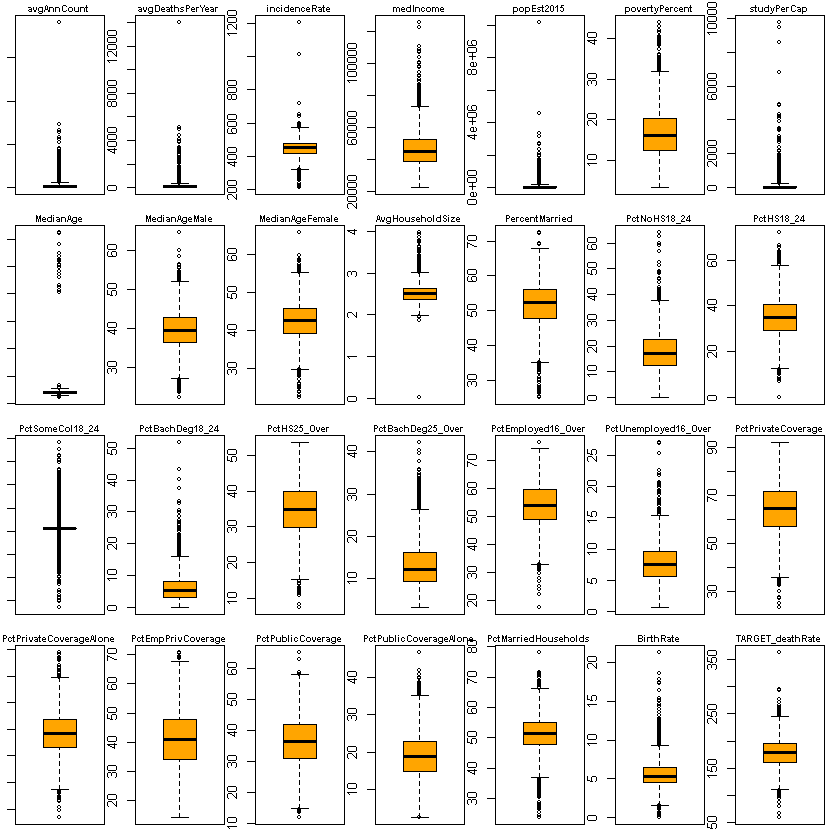

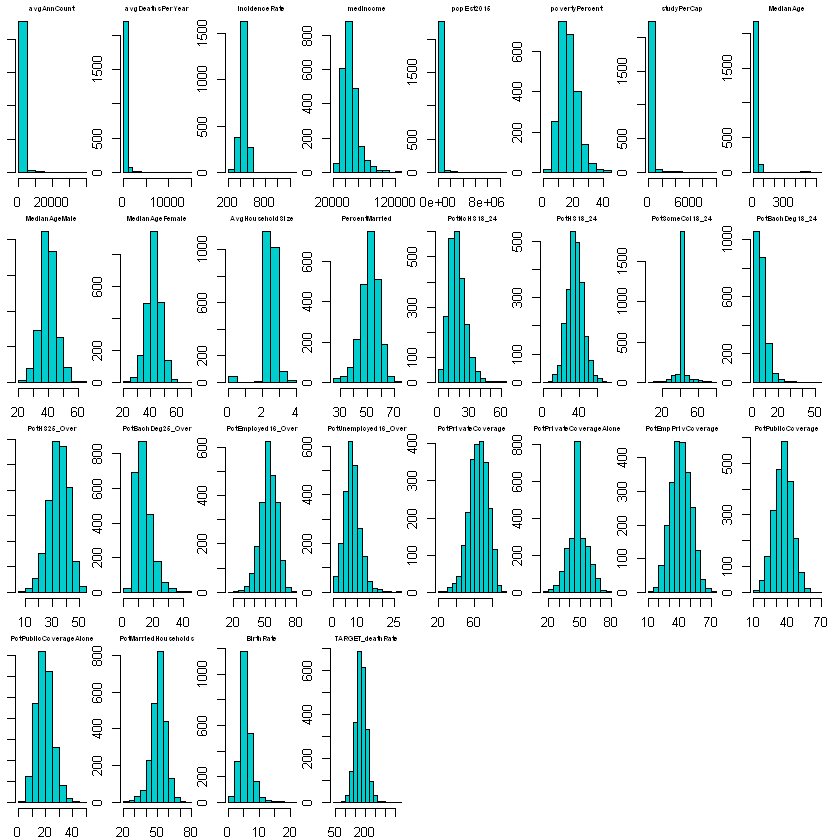

In [5]:
plot_box_hist(data,4)

In [6]:
#define function for transformation
transformation <- function(dataframe, attribute){
    col_index <- which(colnames(dataframe)==attribute)
    hist(dataframe[[col_index]], main=attribute, col='mediumpurple1')
    hist(log(dataframe[[col_index]]+1, 10), main=paste0('log(',attribute,')'), col='khaki2')
    hist(sqrt(dataframe[[col_index]]), main=paste0('sqrt(',attribute,')'), col='plum1')
    }

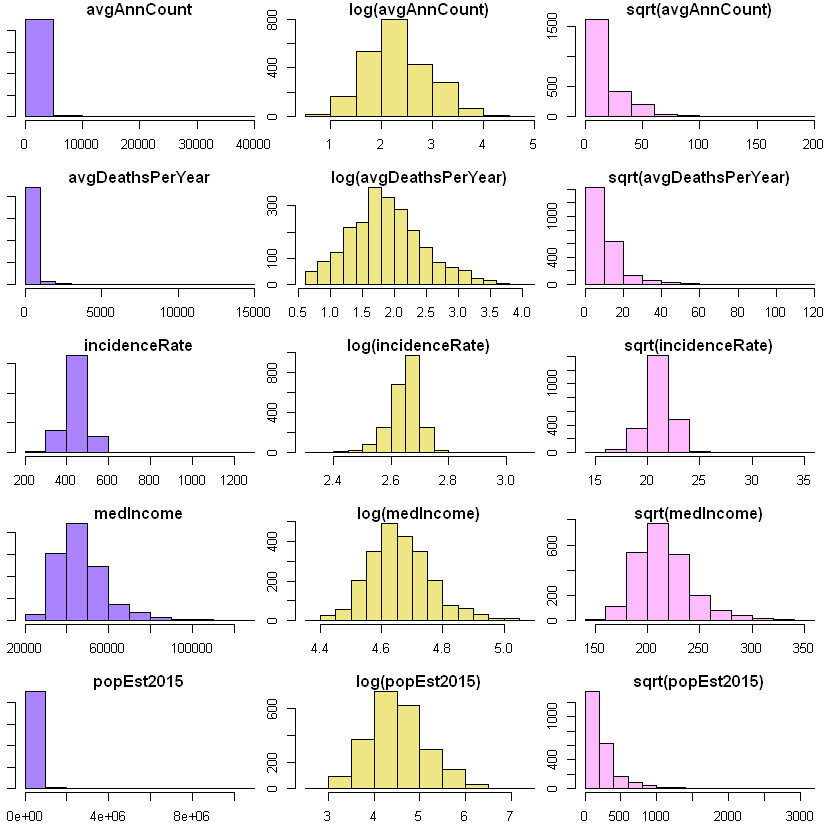

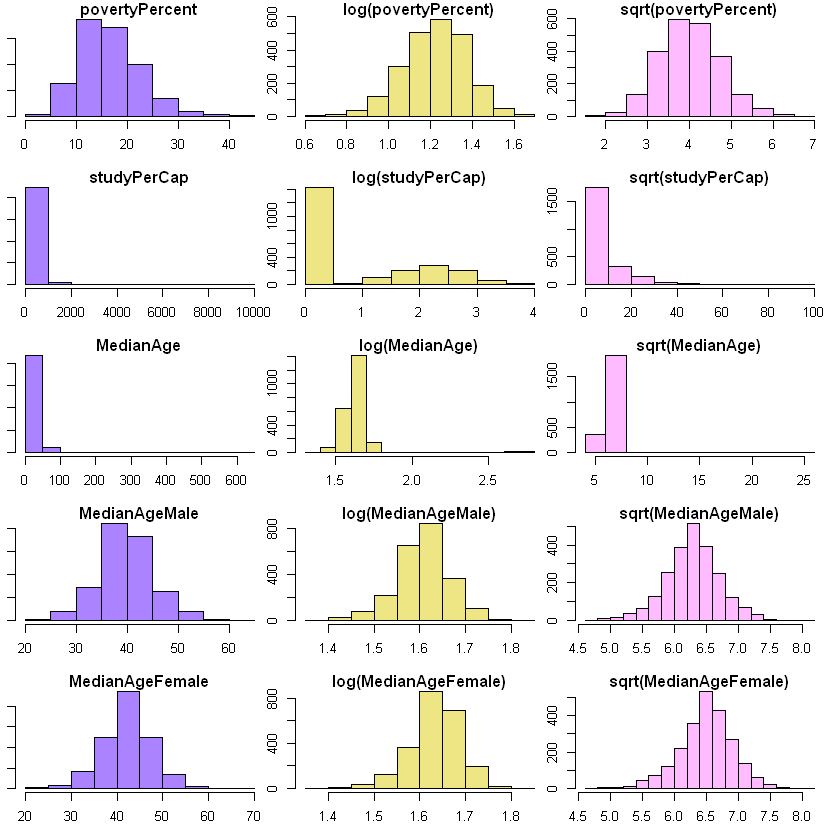

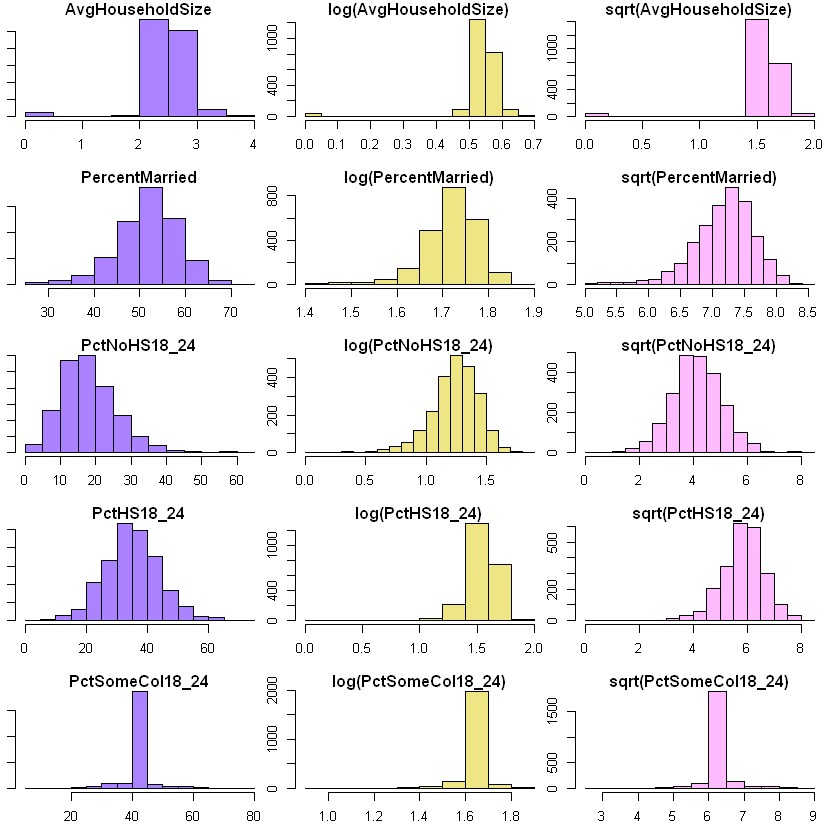

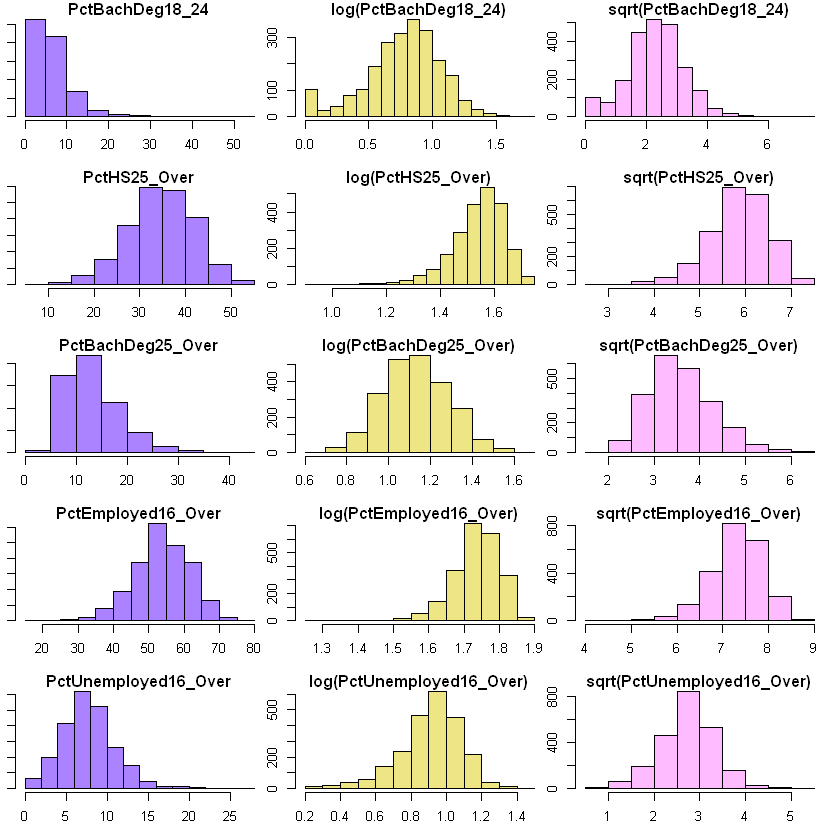

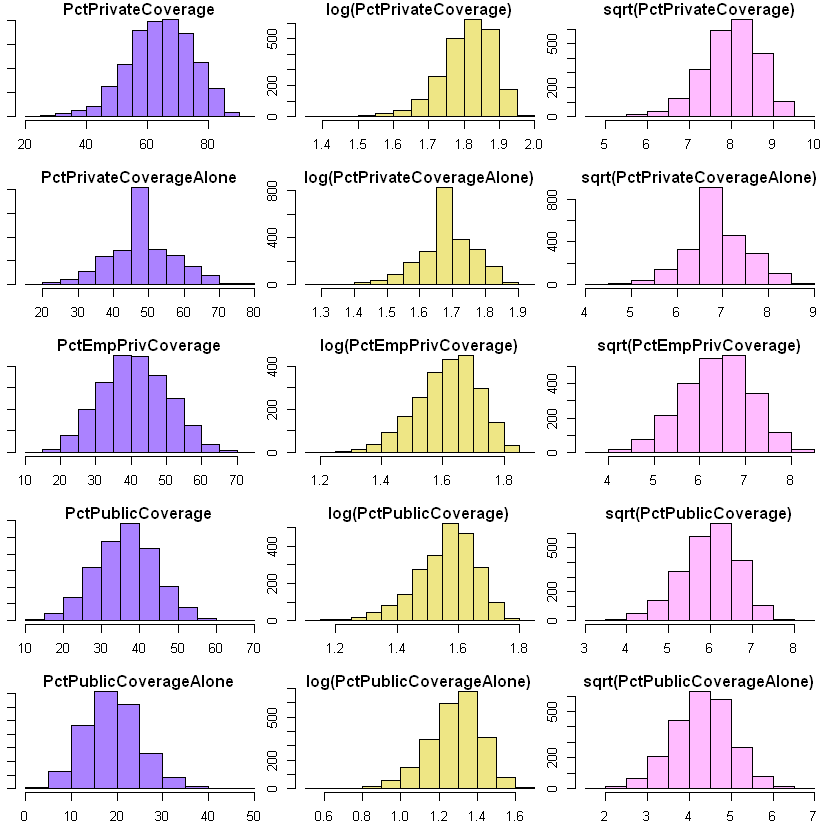

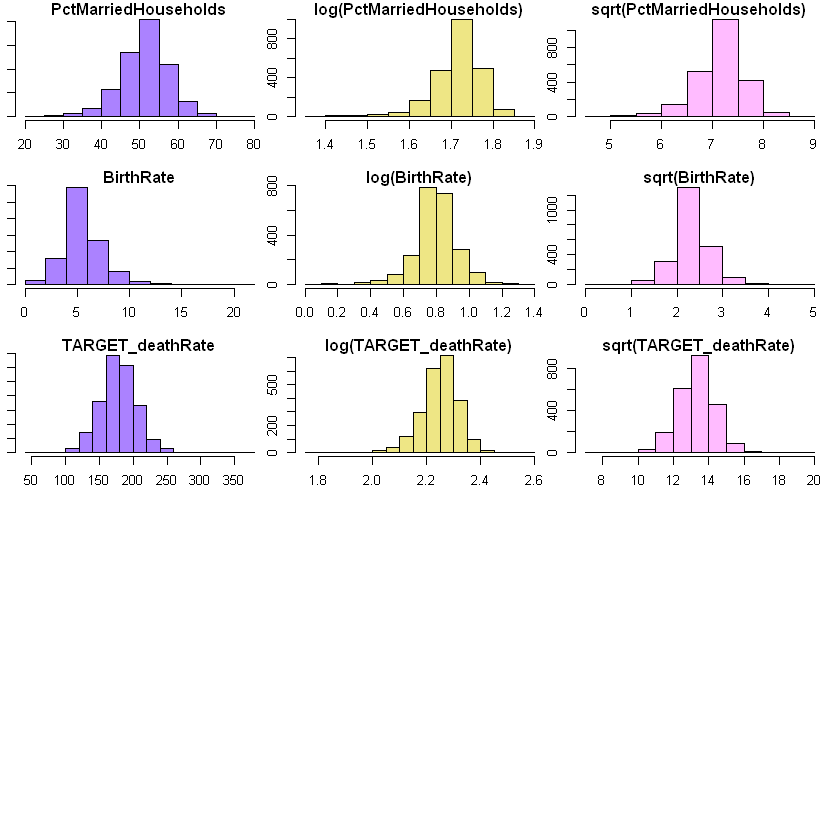

In [7]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
par(mfrow = c(5,3), mar=c(3,1,1,1))
for (name in names(data)){
    transformation(data, name)
}

In [8]:
#transform some features so that they approach normal distribution
transformed_data <- data %>% mutate(log_avgAnnCount=log(avgAnnCount+1),
                                    log_avgDeathsPerYear=log(avgDeathsPerYear+1),
                                    log_incidenceRate=log(incidenceRate+1),
                                   log_mdeIncome=log(medIncome+1),
                                   log_popEst2015=log(popEst2015+1),
                                   sqrt_povertyPercent=sqrt(povertyPercent),
                                   log_studyPerCap=log(studyPerCap+1),
                                   log_MedianAge=log(MedianAge+1),
                                   sqrt_MedianAgeMale=sqrt(MedianAgeMale+1),
                                   sqrt_PctNoHS18_24=sqrt(PctNoHS18_24),
                                   log_PctBachDeg18_24=log(PctBachDeg18_24+1),
                                   log_PctBachDeg25_Over=log(PctBachDeg25_Over+1),
                                   sqrt_PctUnemployed16_Over=sqrt(PctUnemployed16_Over),
                                   sqrt_PctPublicCoverageAlone=sqrt(PctPublicCoverageAlone),
                                   log_BirthRate=log(BirthRate+1))

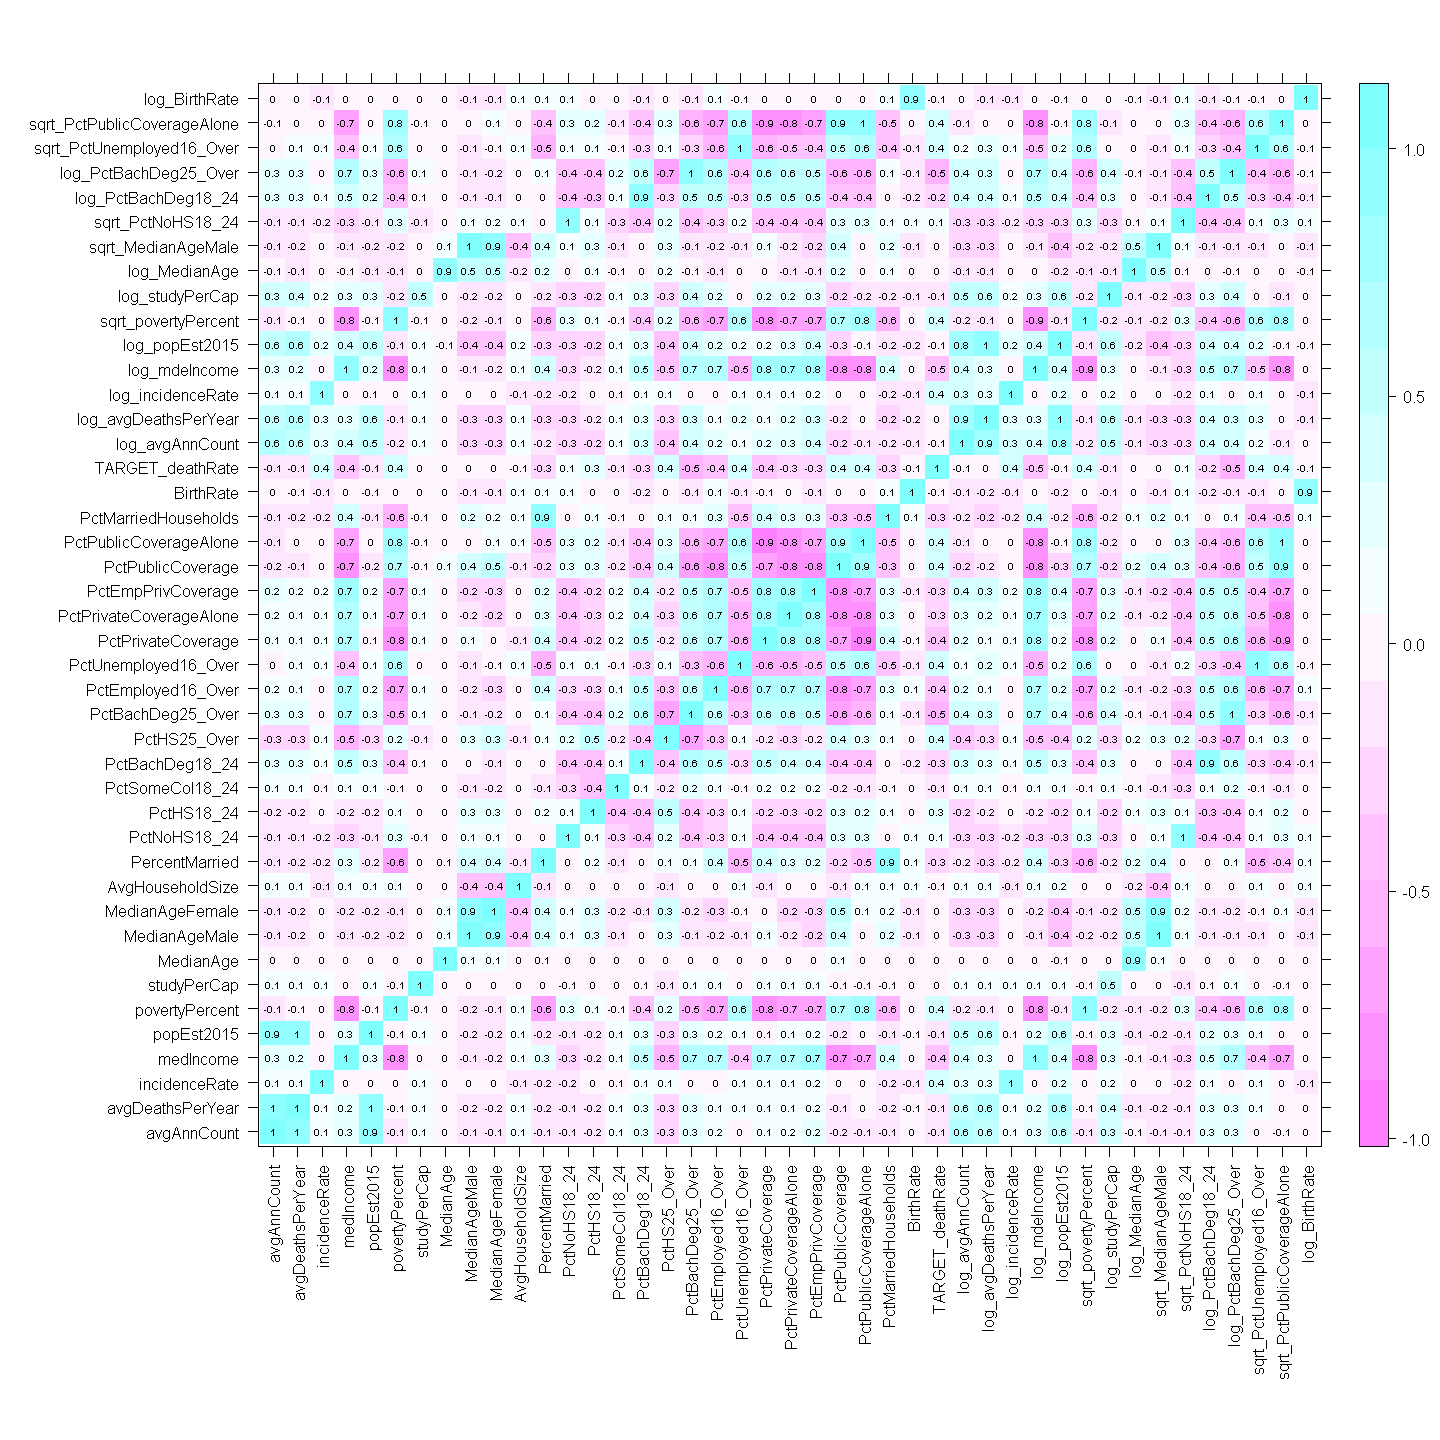

In [9]:
#plot the correlation heatmap
options(repr.plot.width=12, repr.plot.height=12)
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 1), cex=.5)
}
levelplot(cor(transformed_data), xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

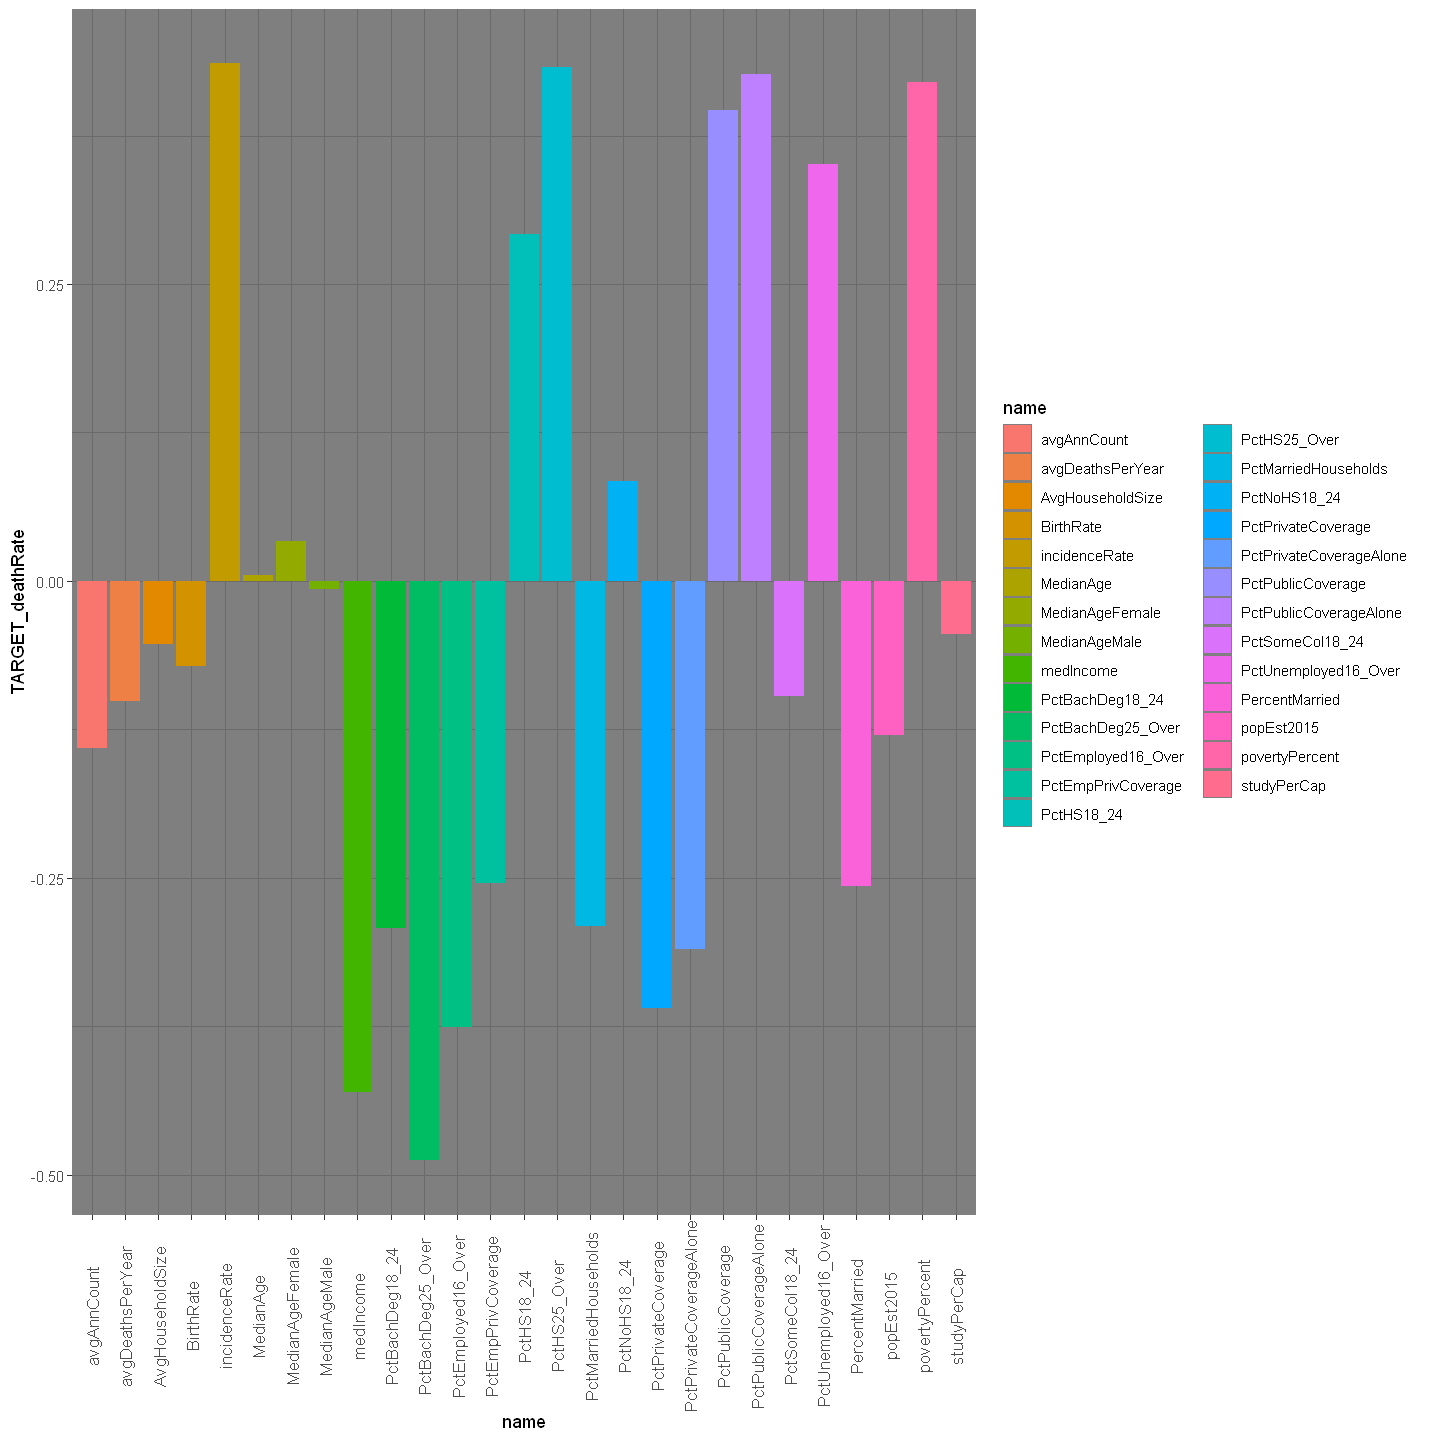

In [10]:
#barplot the correlation coefficients that relate to traget variable
corr <- data.frame(cor(data))[28]
corr$name <- rownames(corr)
corr <- corr[1:nrow(corr)-1,]
ggplot(corr, aes(name, TARGET_deathRate, fill=name)) + geom_bar(stat='identity') + theme_dark() +
theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=10)) + scale_colour_brewer('Diamond\nclarity')

### Linear Regression

In [11]:
#randomly split the data
#70% for training
set.seed(123)
split <- sample(1:nrow(data), 0.7*nrow(data)) #split into 30% for test
train <- data[split,]
test  <- data[-split,]

In [12]:
#define function to plot the model
plot_model <- function(model){    
    options(repr.plot.width=4.5, repr.plot.height=4.5)
    par(mfcol=c(2,2), mar=c(2,1,2,1))
    plot(model)
}


Call:
lm(formula = TARGET_deathRate ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.339 -11.189  -0.544  11.686 137.894 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.217e+02  2.196e+01   5.540 3.54e-08 ***
avgAnnCount             -4.779e-03  1.281e-03  -3.732 0.000197 ***
avgDeathsPerYear         2.144e-02  5.580e-03   3.843 0.000127 ***
incidenceRate            1.743e-01  9.737e-03  17.896  < 2e-16 ***
medIncome                1.092e-04  1.061e-04   1.029 0.303636    
popEst2015              -1.542e-05  7.002e-06  -2.203 0.027755 *  
povertyPercent           8.303e-01  2.338e-01   3.551 0.000394 ***
studyPerCap             -9.479e-04  8.992e-04  -1.054 0.291940    
MedianAge                4.630e-03  1.096e-02   0.422 0.672730    
MedianAgeMale           -5.426e-01  2.815e-01  -1.927 0.054125 .  
MedianAgeFemale          1.937e-01  2.981e-01   0.650 0.515965    
AvgHouseholdSize         1.037e

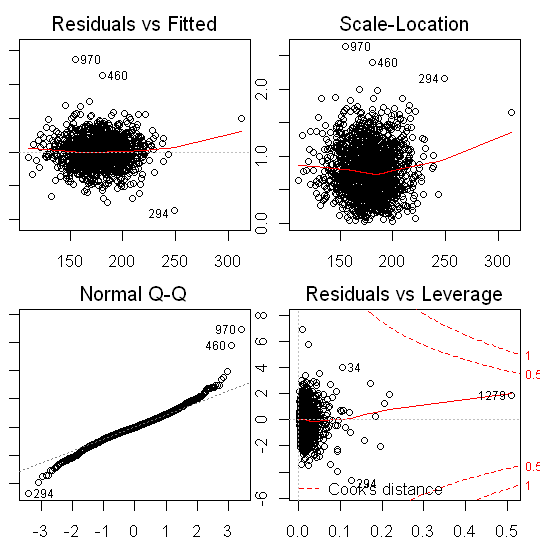

In [13]:
#model1 uses all original features
model1 <- lm(TARGET_deathRate~., train)
summary(model1)
plot_model(model1)

In [14]:
#randomly split the data that includes trnsformed features
set.seed(123)
split <- sample(1:nrow(transformed_data), 0.7*nrow(transformed_data)) #split into 30% for test
t_train <- transformed_data[split,]
t_test  <- transformed_data[-split,]


Call:
lm(formula = TARGET_deathRate ~ ., data = t_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.201  -6.860  -0.213   6.682  70.810 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.115e+03  1.514e+02   7.362 2.91e-13 ***
avgAnnCount                  8.818e-04  1.666e-03   0.529 0.596747    
avgDeathsPerYear            -2.830e-02  5.128e-03  -5.518 4.01e-08 ***
incidenceRate                5.888e-02  2.821e-02   2.087 0.037031 *  
medIncome                    7.537e-05  2.239e-04   0.337 0.736436    
popEst2015                   2.991e-05  4.709e-06   6.352 2.78e-10 ***
povertyPercent               1.084e+00  6.913e-01   1.568 0.117137    
studyPerCap                  1.927e-04  6.899e-04   0.279 0.780002    
MedianAge                   -6.091e-03  5.911e-02  -0.103 0.917946    
MedianAgeMale                3.043e+00  1.413e+00   2.154 0.031413 *  
MedianAgeFemale             -2.343e+00  2.275e-01 -1

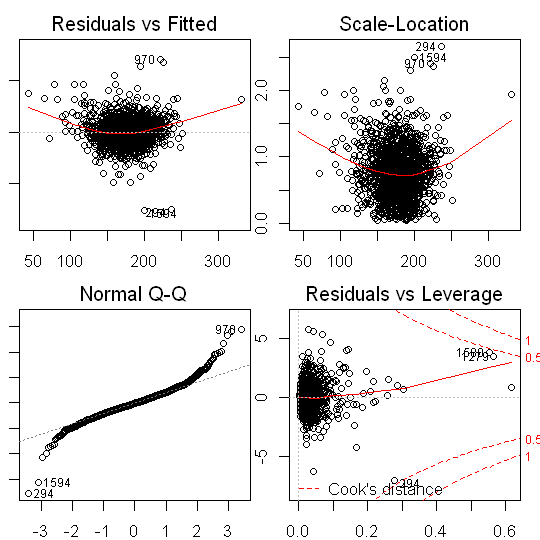

In [15]:
#model2 uses all original features and their transformations
model2 <- lm(TARGET_deathRate~., t_train)
summary(model2)
plot_model(model2)


Call:
lm(formula = TARGET_deathRate ~ .^2, data = t_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2180  -1.5609   0.0054   1.6275  12.9817 

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                            8.768e+04  8.909e+04
avgAnnCount                                           -2.616e+00  3.976e+00
avgDeathsPerYear                                       4.019e+00  1.045e+01
incidenceRate                                          4.679e+01  4.782e+01
medIncome                                              6.659e-02  2.159e-01
popEst2015                                             1.780e-02  1.211e-02
povertyPercent                                        -6.496e+01  4.272e+02
studyPerCap                                            3.622e-01  1.251e+00
MedianAge                                              6.418e+02  1.262e+03
MedianAgeMale                                         -6.979e

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

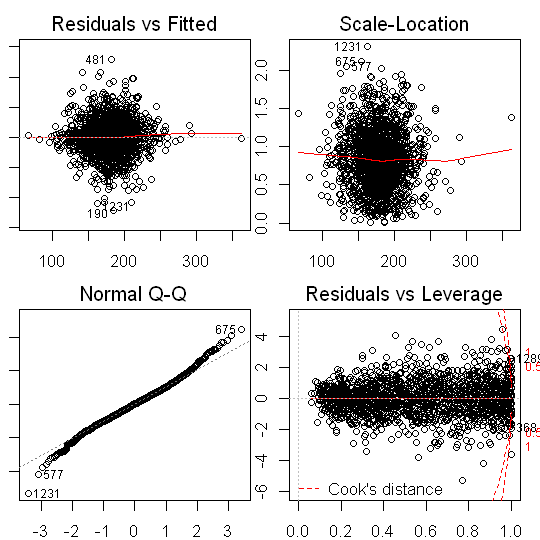

In [16]:
#model3 uses all interactions
model3 <- lm(TARGET_deathRate~.^2, t_train)
summary(model3)
plot_model(model3)

Start:  AIC=10682.32
TARGET_deathRate ~ avgAnnCount

                              Df Sum of Sq     RSS   AIC
+ log_PctBachDeg25_Over        1    276897  941803 10275
+ PctBachDeg25_Over            1    264055  954645 10297
+ log_incidenceRate            1    233210  985490 10348
+ incidenceRate                1    231703  986997 10350
+ log_mdeIncome                1    229239  989462 10354
+ sqrt_PctPublicCoverageAlone  1    219403  999297 10370
+ sqrt_povertyPercent          1    216190 1002511 10376
+ PctPublicCoverageAlone       1    212444 1006256 10382
+ povertyPercent               1    208478 1010222 10388
+ PctHS25_Over                 1    207492 1011208 10389
+ medIncome                    1    206812 1011888 10390
+ PctPublicCoverage            1    172429 1046271 10444
+ sqrt_PctUnemployed16_Over    1    170257 1048443 10448
+ PctUnemployed16_Over         1    160099 1058601 10463
+ PctEmployed16_Over           1    152048 1066652 10475
+ PctPrivateCoverage           1   


Call:
lm(formula = step, data = t_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.146  -3.839  -0.019   3.570  52.795 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     3.304e+02  3.711e+02   0.890
avgAnnCount                                     1.075e+00  3.639e-02  29.534
log_PctBachDeg25_Over                          -2.221e+01  2.575e+00  -8.625
log_incidenceRate                              -6.254e+01  5.694e+01  -1.098
PctMarriedHouseholds                           -2.248e+00  3.352e-01  -6.705
log_avgDeathsPerYear                            1.393e+02  1.160e+01  12.005
log_popEst2015                                  9.466e+00  1.468e+01   0.645
MedianAgeFemale                                 2.328e+00  3.151e+00   0.739
PctBachDeg25_Over                              -1.306e+00  5.120e+00  -0.255
PctHS18_24                                      3.334e-01  1.738e-01   1.918
Pe

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

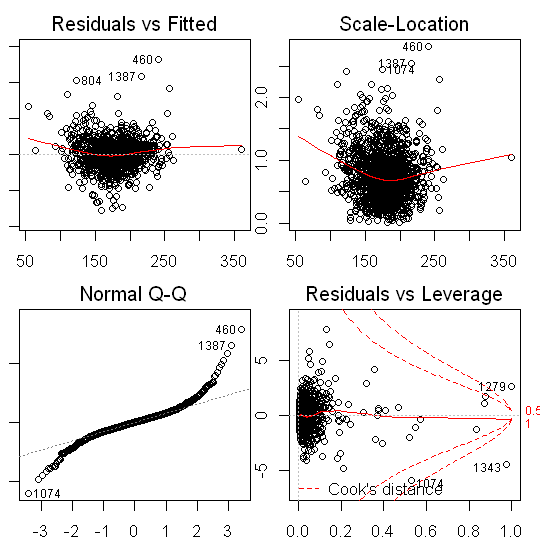

In [17]:
#model4 uses BIC forward stepwise selection on model3
temp <- lm(TARGET_deathRate~avgAnnCount, t_train) #lower scope of forward stepwise selection
step <- step(temp, direction="forward", scope=list(lower=temp, upper=model3), k=log(nrow(t_train)))
model4 <- lm(step, t_train)
summary(model4)
plot_model(model4)

      rstudent unadjusted p-value Bonferroni p
460   8.032305         1.8690e-15   3.0072e-12
1387  6.570575         6.8132e-11   1.0962e-07
1074 -6.067402         1.6288e-09   2.6207e-06
804   5.891173         4.6893e-09   7.5451e-06
970   5.246359         1.7644e-07   2.8390e-04
45    4.918901         9.6233e-07   1.5484e-03
531  -4.900266         1.0567e-06   1.7003e-03
145   4.642303         3.7345e-06   6.0088e-03
1343 -4.548745         5.8142e-06   9.3551e-03
917   4.196171         2.8677e-05   4.6142e-02

,StudRes,Hat,CookD
460,8.032305,0.1332741,0.1945431
1279,2.611022,0.9983175,82.2492798
1343,-4.548745,0.9762307,17.1267794
1387,6.570575,0.1443169,0.1446872


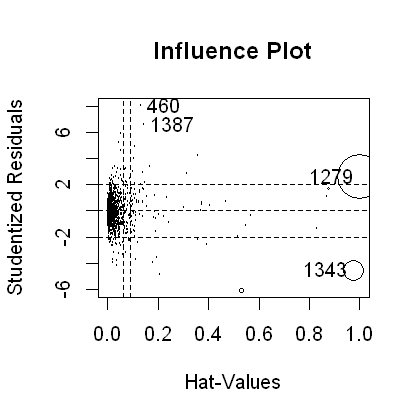

In [18]:
#check for influential outliers
outlierTest(model4, cutoff=0.05, digits = 1)
options(repr.plot.width=3.5, repr.plot.height=3.5)
influencePlot(model4, scale=5, main="Influence Plot")


Call:
lm(formula = formula(model4), data = dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.576  -3.755   0.075   3.552  40.602 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     2.910e+02  3.548e+02   0.820
avgAnnCount                                     9.066e-01  4.016e-02  22.578
log_PctBachDeg25_Over                          -2.294e+01  2.474e+00  -9.272
log_incidenceRate                              -5.262e+01  5.445e+01  -0.966
PctMarriedHouseholds                           -2.268e+00  3.211e-01  -7.062
log_avgDeathsPerYear                            1.445e+02  1.123e+01  12.859
log_popEst2015                                  9.129e+00  1.405e+01   0.650
MedianAgeFemale                                 1.447e+00  3.015e+00   0.480
PctBachDeg25_Over                               1.429e+00  4.906e+00   0.291
PctHS18_24                                      4.105e-01  1.668e-01  

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

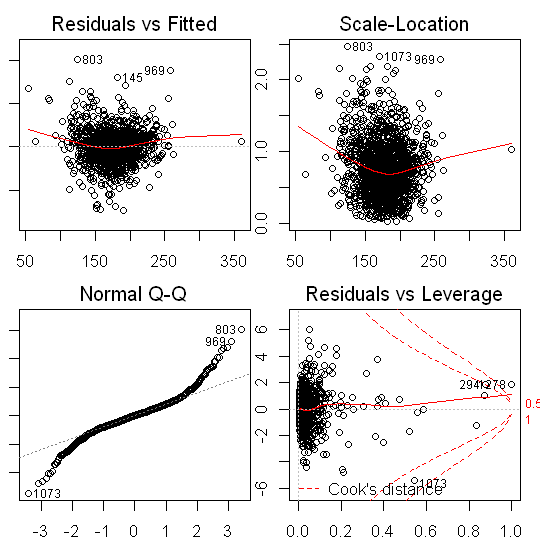

In [19]:
#model5 is based on model4 after removing outliers
dummy <- t_train[c(-460, -1343, -1387),] #remove the influential outliers
model5 <- lm(formula(model4), dummy)
summary(model5)
plot_model(model5)

### Result

No id variables; using all as measure variables
Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

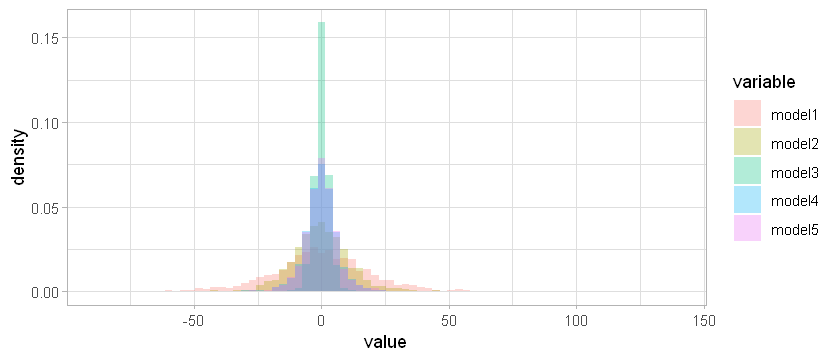

In [20]:
#plot residual histograms
residual <- data.frame(matrix(3, length(resid(model1)))) #pre-define dataframe dimension

residual$model1 <- resid(model1)
residual$model2 <- resid(model2)
residual$model3 <- resid(model3)
residual$model4 <- resid(model4)
residual$model5 <- c(resid(model5), rep(NA, nrow(residual)-length(resid(model5))))

m1 <- melt(residual[-1]) #convert from wide to long

options(repr.plot.width=NULL, repr.plot.height=3)
ggplot(m1, aes(x=value, fill=variable)) + 
geom_histogram(alpha = 0.3, aes(y = ..density..), position = 'identity', binwidth=3) + theme_light()

In [21]:
#compute accuracy metrics
accuracy <- data.frame(matrix(1, 5))

#RMSE
accuracy$RMSE <- round(c(rmse(model1, test), rmse(model2, t_test), rmse(model3, t_test),
                   rmse(model4, t_test), rmse(model5, t_test)), 6)
#MAE
accuracy$MAE <- round(c(mae(model1, test), mae(model2, t_test), mae(model3, t_test),
                   mae(model4, t_test), mae(model5, t_test)), 6)
#R2
accuracy$R2 <- round(c(rsquare(model1, test), rsquare(model2, t_test), rsquare(model3, t_test),
                   rsquare(model4, t_test), rsquare(model5, t_test)), 3)
#number of predictors
accuracy$p <- c(length(coefficients(model1))-1, length(coefficients(model2))-1, length(coefficients(model3))-1,
                         length(coefficients(model4))-1, length(coefficients(model5))-1)
#f-statistic
accuracy$F_score <- round(c(as.numeric(summary(model1)$fstatistic[1]), as.numeric(summary(model2)$fstatistic[1]),
                     as.numeric(summary(model3)$fstatistic[1]), as.numeric(summary(model4)$fstatistic[1]),
                     as.numeric(summary(model5)$fstatistic[1])), 1)

accuracy <- accuracy[-1]
row.names(accuracy) <- c('model1', 'model2', 'model3', 'model4', 'model5')
accuracy

,RMSE,MAE,R2,p,F_score
model1,17.408815,13.145634,0.562,27,56.7
model2,11.467914,8.672618,0.810,42,155.4
model3,460.177726,46.906812,-304.305,903,73.3
model4,7.764776,5.349155,0.913,48,466.0
model5,7.649549,5.206413,0.916,48,504.1


In [22]:
#repeated k-fold cross-validation
set.seed(123)
train_control <- trainControl(method = 'repeatedcv', number = 10, repeats = 6)
cv.model <- train(formula(model5), data = dummy, method = "lm", trControl = train_control)
print(cv.model)

Linear Regression 

1606 samples
  17 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 6 times) 
Summary of sample sizes: 1445, 1447, 1445, 1445, 1446, 1445, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  9.109893  0.8945073  5.297789

Tuning parameter 'intercept' was held constant at a value of TRUE


### Discussion

- Comparing between model1 and model2: the model fitness and prediction accuracy increase by 44.6% and 34.1% respectively by just adding the transformations.
- Model3 may highly overfit the data as evident by using 903 predictors. In its residual-vs-leverage plots above, all the data points move away from Cook's distance and involved many outliers. The negative R2 indicates the model wrongly fits the data.
- Comparing between model2 and model4: the RMSE reduces by 32.3%, the MAE reduces by 38.3%, and R2 increases by 12.7%.
- The prediction accuracy and model fitness of model5 also increase slightly compared to model4. 
- However, cross-validation shows that the performance of model5 decreases. The difference between the two RMSEs is larger than the difference between the two MAEs, this may imply that there exists some influential extreme values. Given that a RMSE of 9.11 and the mean target value is 178, it could mean that the error rate is 5.1%.
- 5.1% may look acceptable. However, given that this task is health-related, a lower error rate or higher prediction accuracy is highly desirable. A better should be further developed.